           Development of a Widget
The object of this notebook is providing a widget that will compare
the level of ozone pollution of two cities:

Montpellier and Paris 13e.

The idea is to answer the following question:

Does it exist a significant level of ozone pollution between two cities?
    
  


In [6]:
import os
import sys
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 100})  # 
%matplotlib notebook

In [7]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from statsmodels.formula.api import ols
import statsmodels.api as sm

directory = Path.cwd() 
directory = directory.joinpath('prebuiltimages')
def my_saving_display(fig, directory, image_name, imageformat="pdf",
                      saving=False):
    """"Saving with personal function."""
    if saving is True:
        fig.savefig(directory.joinpath(image_name + '.' + imageformat),
                    
                    format=imageformat)

1) Data importation 

We import data from the following website:

http://www.airparif.asso.fr/telechargement/confirme/id/06bb94ba3f23ad75144acf9bce05d014


http://data-atmo-occitanie.opendata.arcgis.com/datasets/4a648b54876f485e92f22e2ad5a5da32_0

The first website is about Paris 13e data. It contents NO2, O3 and the date data.

The second one gives us the occitanie data which belows .Montpellier 



In [8]:
occ1 = pd.read_csv("Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv", sep="," , header=0 )
occ1.head()
occ2 = pd.read_csv("20190401_20200331-PA13_auto.csv", sep=";" , header=0)
occ2.head()

date  heure        NO2         O3
0         NaN    NaN  microg/m3  microg/m3
1  01/04/2019    1.0         16         51
2  01/04/2019    2.0         16         48
3  01/04/2019    3.0         18         46
4  01/04/2019    4.0         21         40

2) Data treatment

We have to give a usable format to the date in order to exploit it.


In [9]:
occ2 = occ2[occ2.date.isna()==False]

In [10]:
occ2.head()

date  heure NO2  O3
1  01/04/2019    1.0  16  51
2  01/04/2019    2.0  16  48
3  01/04/2019    3.0  18  46
4  01/04/2019    4.0  21  40
5  01/04/2019    5.0  36  24

We notice that Paris 13e  data is evaluated in hours. Show we will calculate the mean in days.


In [6]:
occ2=occ2[occ2['NO2']!='n/d']
occ2['NO2']=occ2['NO2'].astype('float')
occ_PARIS13= occ2.groupby('date').agg({'NO2':'mean'})

In [7]:
occ_PARIS13.head()

NO2
date                 
01/01/2020  26.333333
01/02/2020  16.541667
01/03/2020  23.250000
01/04/2019  30.375000
01/05/2019  22.791667

We must give the date a usable format to exploit datas:

In [8]:
occ1['date'] = pd.to_datetime(occ1['date_debut']).dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


We are going to see the cities of occitanie 

In [9]:
occ1.nom_com.unique()  

array(['MONTPELLIER', 'TOULOUSE', 'NIMES', 'BELESTA-EN-LAURAGAIS',
       'BIARS-SUR-CERE', 'PEYRUSSE-VIEILLE', 'MIRAMONT-DE-COMMINGES',
       'BESSIERES', 'BLAGNAC', 'LUNEL-VIEL', 'PERPIGNAN', 'CASTRES',
       'LOURDES', 'AGDE', 'TARBES', 'ALBI', 'SAINT-GELY-DU-FESC',
       'SAINT-GAUDENS', 'SAINT-ESTEVE', 'SAZE', 'LATTES', 'MONTGISCARD',
       'CORNEILHAN', 'SAINT-LAURENT-DES-ARBRES', 'LA CALMETTE', 'RODEZ',
       'CAUNES-MINERVOIS', 'MENDE', 'CARCASSONNE', 'ROQUEREDONDE',
       'VALLABREGUES'], dtype=object)

We will only focus one Montpellier data.

In [10]:
df =occ1[occ1['nom_com']=='MONTPELLIER']

We will only use NO2 data.

In [11]:
df =df[df['nom_poll']=='NO2']

In [12]:
df.head()

X        Y nom_dept      nom_com  insee_com  \
0    3.87460  43.6050  HERAULT  MONTPELLIER      34172   
40   3.87460  43.6050  HERAULT  MONTPELLIER      34172   
56   3.86472  43.6117  HERAULT  MONTPELLIER      34172   
169  3.88689  43.5915  HERAULT  MONTPELLIER      34172   
178  3.87460  43.6050  HERAULT  MONTPELLIER      34172   

                            nom_station code_station typologie influence  \
0      Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   
40     Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   
56         Montpellier - Chaptal Urbain      FR50201   Urbaine      Fond   
169  Montpellier - Prés d Arènes Urbain      FR50200   Urbaine      Fond   
178    Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   

    nom_poll  ...  valeur   unite     metrique                date_debut  \
0        NO2  ...    12.1  ug.m-3  journaliere  2020-01-19T01:00:00.000Z   
40       NO2  ...     9.7  ug.m-3  journaliere  2020-04-11T01:00:00.000Z   
56       NO2  ...     8.5  ug.m-3  journaliere  2020-04-11T01:00:00.000Z   
169      NO2  ...    14.6  ug.m-3  journaliere  2020-01-20T01:00:00.000Z   
178      NO2  ...    19.6  ug.m-3  journaliere  2020-01-20T01:00:00.000Z   

                     date_fin statut_valid   x_l93    y_l93  ObjectId     date  
0    2020-01-20T00:00:00.000Z            t  770633  6278830      5001  2020-01  
40   2020-04-12T00:00:00.000Z            t  770633  6278830      5041  2020-04  
56   2020-04-12T00:00:00.000Z            t  769827  6279565      5057  2020-04  
169  2020-01-21T00:00:00.000Z            t  771642  6277340      5170  2020-01  
178  2020-01-21T00:00:00.000Z            t  770633  6278830      5179  2020-01  

[5 rows x 21 columns]

We are going to insert a column of date in Montpellier data. So we can compare it with NO2 data of Paris 13e.

In [13]:
df['jour']=[str(x)[:10] for x in df['date_debut']]

In [14]:
df.head()

X        Y nom_dept      nom_com  insee_com  \
0    3.87460  43.6050  HERAULT  MONTPELLIER      34172   
40   3.87460  43.6050  HERAULT  MONTPELLIER      34172   
56   3.86472  43.6117  HERAULT  MONTPELLIER      34172   
169  3.88689  43.5915  HERAULT  MONTPELLIER      34172   
178  3.87460  43.6050  HERAULT  MONTPELLIER      34172   

                            nom_station code_station typologie influence  \
0      Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   
40     Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   
56         Montpellier - Chaptal Urbain      FR50201   Urbaine      Fond   
169  Montpellier - Prés d Arènes Urbain      FR50200   Urbaine      Fond   
178    Montpellier - Saint Denis Trafic      FR50202   Urbaine    Trafic   

    nom_poll  ...   unite     metrique                date_debut  \
0        NO2  ...  ug.m-3  journaliere  2020-01-19T01:00:00.000Z   
40       NO2  ...  ug.m-3  journaliere  2020-04-11T01:00:00.000Z   
56       NO2  ...  ug.m-3  journaliere  2020-04-11T01:00:00.000Z   
169      NO2  ...  ug.m-3  journaliere  2020-01-20T01:00:00.000Z   
178      NO2  ...  ug.m-3  journaliere  2020-01-20T01:00:00.000Z   

                     date_fin statut_valid   x_l93    y_l93  ObjectId  \
0    2020-01-20T00:00:00.000Z            t  770633  6278830      5001   
40   2020-04-12T00:00:00.000Z            t  770633  6278830      5041   
56   2020-04-12T00:00:00.000Z            t  769827  6279565      5057   
169  2020-01-21T00:00:00.000Z            t  771642  6277340      5170   
178  2020-01-21T00:00:00.000Z            t  770633  6278830      5179   

        date        jour  
0    2020-01  2020-01-19  
40   2020-04  2020-04-11  
56   2020-04  2020-04-11  
169  2020-01  2020-01-20  
178  2020-01  2020-01-20  

[5 rows x 22 columns]

As we did it for Paris 13e we are  going to evaluate the mean of NO2 for Montpellier.

In [15]:
occ_Montpellier = df.groupby('jour').agg({'valeur':'mean'})

In [16]:
occ_Montpellier.head()

valeur
jour              
2019-04-21  16.625
2019-04-22  15.775
2019-04-23  27.275
2019-04-24  15.650
2019-04-25  15.350

In [17]:
occ_Montpellier.columns=['NO2']

In [18]:
occ_Montpellier.head()

NO2
jour              
2019-04-21  16.625
2019-04-22  15.775
2019-04-23  27.275
2019-04-24  15.650
2019-04-25  15.350

We can now make the graphics.

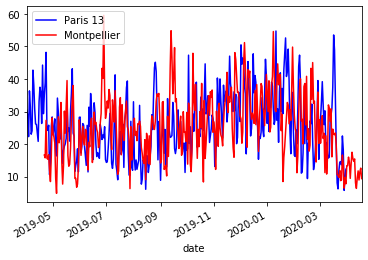

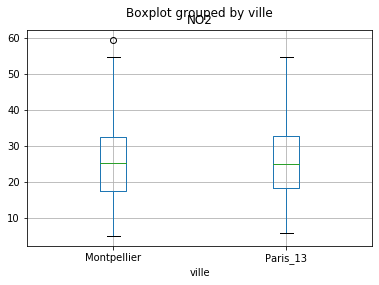

In [19]:
import datetime 
from datetime import datetime
occ_PARIS13['date'] = occ_PARIS13.index
occ_PARIS13['date'] = [ datetime.strptime(t, '%d/%m/%Y') for t in occ_PARIS13['date'].astype('str')]
occ_PARIS13['ville'] = 'Paris_13'
occ_PARIS13 = occ_PARIS13[['date', 'ville', 'NO2']]
occ_PARIS13

occ_Montpellier['date'] = occ_Montpellier.index
occ_Montpellier['date'] = [ datetime.strptime(t, '%Y-%m-%d') for t in occ_Montpellier['date'].astype('str')]
occ_Montpellier['ville'] = 'Montpellier'
occ_Montpellier = occ_Montpellier[['date', 'ville', 'NO2']]


df_final = pd.concat([occ_PARIS13, occ_Montpellier])
df_final = df_final.sort_values('date')
import matplotlib.pyplot as plt

# Line plot
ax = plt.gca()
df_final[df_final['ville'] == "Paris_13"].plot(kind='line',x='date',y='NO2',ax=ax, color = 'blue', label = 'Paris 13')
df_final[df_final['ville'] == "Montpellier"].plot(kind='line',x='date',y='NO2', color='red', ax=ax, label = 'Montpellier')
plt.show()

## Boxplot
df_final.boxplot('NO2', by = 'ville')


In figure 1, the level of NO2 is as important as in Paris 13e that in Montpellier.

In figure 2, we notice the same situation.

So we going to examinate if there is not any caracter that can differenciate  them.

In [20]:
results = ols('NO2 ~ ville', data=df_final).fit()

In [21]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

sum_sq     df         F    PR(>F)
ville        36.290375    1.0  0.356588  0.550594
Residual  73784.027437  725.0       NaN       NaN

We find that the  PR(>F) is 55% of NO2 pollution. it is not significant if we  take the two cities.

In [22]:
df.date.unique()

<PeriodArray>
['2020-01', '2020-04', '2020-02', '2020-03', '2019-05', '2019-12', '2019-09',
 '2019-07', '2019-08', '2019-10', '2019-11', '2019-06', '2019-04']
Length: 13, dtype: period[M]

In [23]:
mont = df[df['nom_com'] == 'MONTPELLIER']

In [24]:
mont = mont[mont.date == '2020-04']

In [25]:
mont.code_station.unique()

array(['FR50202', 'FR50201', 'FR50203', 'FR50200'], dtype=object)